### Inciso b

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# función dP/dt
def dP_dt(P):
    return 0.0225 * P - 0.0003 * P**3

Método de Euler

In [61]:
def euler(P0, t0, tf, h):
    t_values = np.arange(t0, tf + h, h)
    P_values = np.zeros(len(t_values))
    P_values[0] = P0
    
    for i in range(1, len(t_values)):
        P_values[i] = P_values[i-1] + h * dP_dt(P_values[i-1])
    
    return t_values, P_values

Método de Heun

In [62]:
def heun(P0, t0, tf, h):
    t_values = np.arange(t0, tf + h, h)
    P_values = np.zeros(len(t_values))
    P_values[0] = P0
    
    for i in range(1, len(t_values)):
        k1 = dP_dt(P_values[i-1])
        k2 = dP_dt(P_values[i-1] + h * k1)
        P_values[i] = P_values[i-1] + h/2 * (k1 + k2)
    
    return t_values, P_values

Método de Taylor de orden 2

In [63]:
def taylor2(P0, t0, tf, h):
    t_values = np.arange(t0, tf + h, h)
    P_values = np.zeros(len(t_values))
    P_values[0] = P0
    
    for i in range(1, len(t_values)):
        P = P_values[i-1]
        dP = dP_dt(P)
        d2P = 0.0225 - 0.0009 * P**2 # derivada de dP/dt
        P_values[i] = P + h * dP + (h**2/2) * d2P
    
    return t_values, P_values

In [64]:
#Datos
P0 = 25
t0 = 0
tf = 10 # 10 años

In [65]:
h = 1   # tamaño de paso en años

In [66]:
t_euler, P_euler = euler(P0, t0, tf, h)
t_heun, P_heun = heun(P0, t0, tf, h)
t_taylor, P_taylor = taylor2(P0, t0, tf, h)

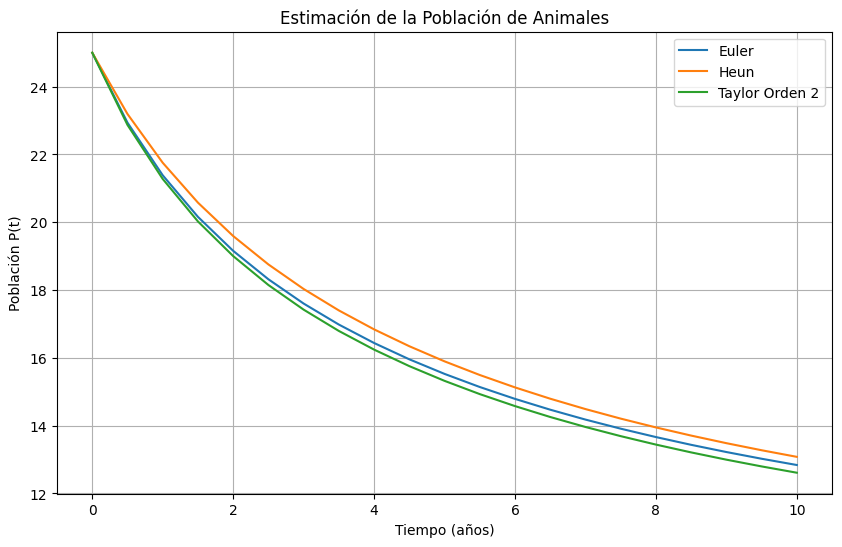

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(t_euler, P_euler, label="Euler")
plt.plot(t_heun, P_heun, label="Heun")
plt.plot(t_taylor, P_taylor, label="Taylor Orden 2")
plt.xlabel('Tiempo (años)')
plt.ylabel('Población P(t)')
plt.title('Estimación de la Población de Animales')
plt.legend()
plt.grid(True)
plt.show()

### Inciso c

In [68]:
P_limit = np.sqrt(75)

In [69]:
def porcentage_calculo(P_values, P_limit, t_values, t):
    index = np.where(t_values == t)[0][0]
    P_at_t = P_values[index]
    percentage = (P_at_t / P_limit) * 100
    return percentage

In [72]:
# Se usan los valores de taylor2 porque son mas asertados
percentage_5_years = porcentage_calculo(P_taylor, P_limit, t_taylor, 5)
percentage_10_years = porcentage_calculo(P_taylor, P_limit, t_taylor, 10)

print(f"Tamaño de paso h: {h}")
print(f"Porcentaje 5 años: {percentage_5_years:.2f}%")
print(f"Porcentaje 10 años: {percentage_10_years:.2f}%")

Tamaño de paso h: 0.5
Porcentaje 5 años: 176.92%
Porcentaje 10 años: 145.63%
